Original Image


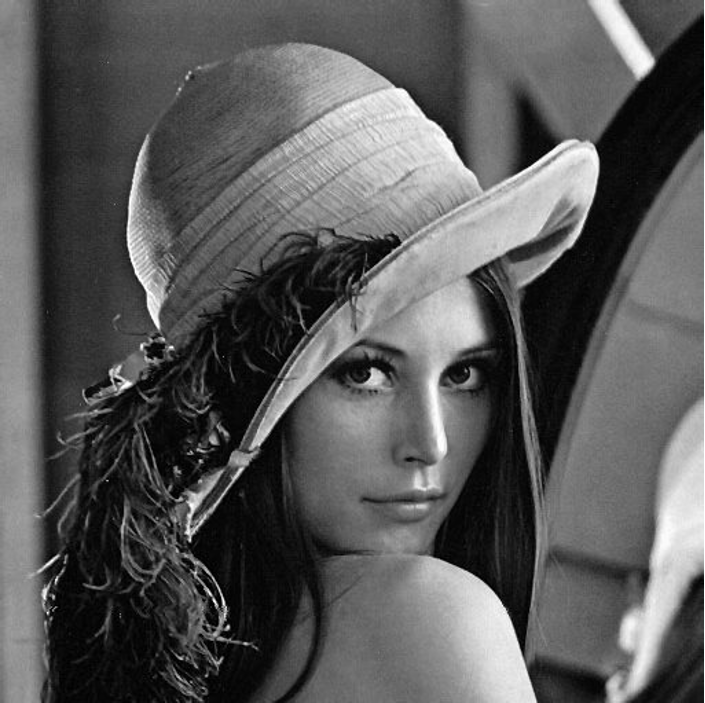

Resized Image (Linear Interpolation)


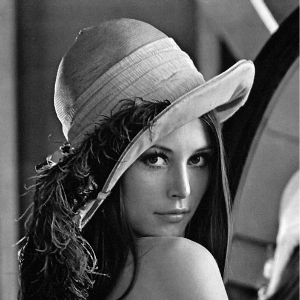

Resized Image (Nearest Neighbors Interpolation)


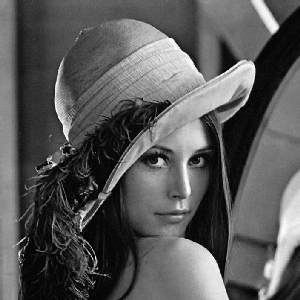

Resized Image (Polynomial/Bicubic Interpolation)


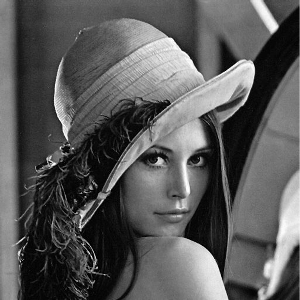

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load the image
image = cv2.imread('/content/actress.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Define the new dimensions
    new_width = 300
    new_height = 300
    new_dimensions = (new_width, new_height)

    # 1.1.1 Linear Interpolation
    resized_linear = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)

    # 1.1.2 Nearest Neighbors Interpolation
    resized_nearest = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_NEAREST)

    # 1.1.3 Polynomial Interpolation (Bicubic)
    resized_poly = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_CUBIC)

    # Display the original and resized images using cv2_imshow
    print("Original Image")
    cv2_imshow(image)

    print("Resized Image (Linear Interpolation)")
    cv2_imshow(resized_linear)

    print("Resized Image (Nearest Neighbors Interpolation)")
    cv2_imshow(resized_nearest)

    print("Resized Image (Polynomial/Bicubic Interpolation)")
    cv2_imshow(resized_poly)

Original Image


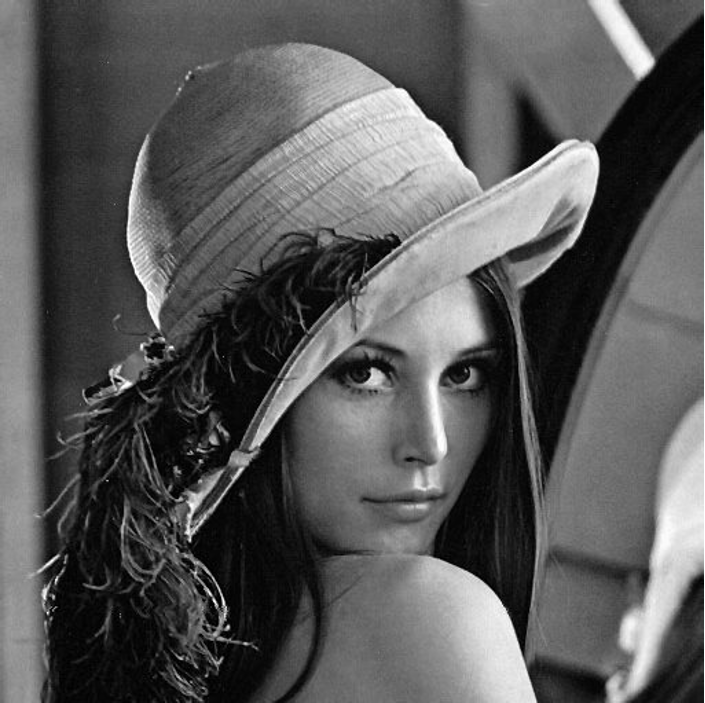

Box Blurred Image


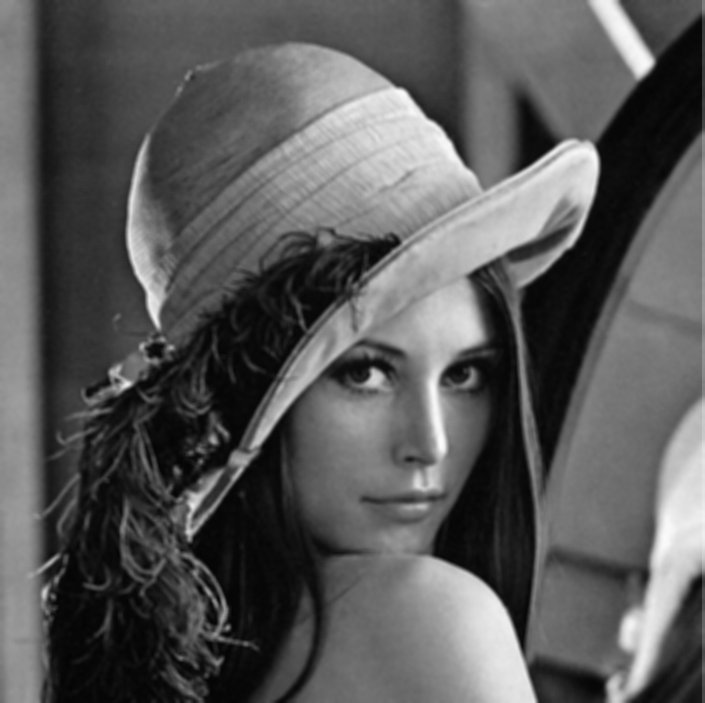

Gaussian Blurred Image


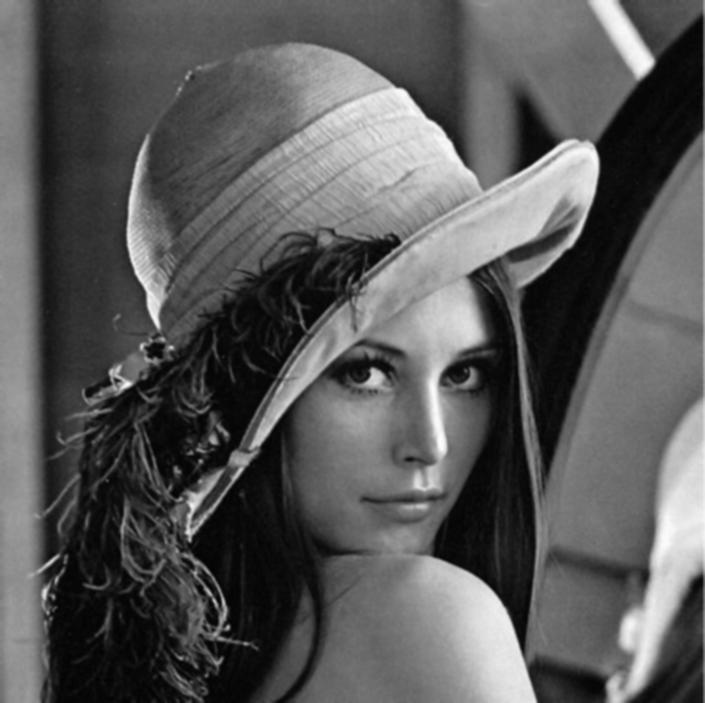

Adaptive Blurred Image


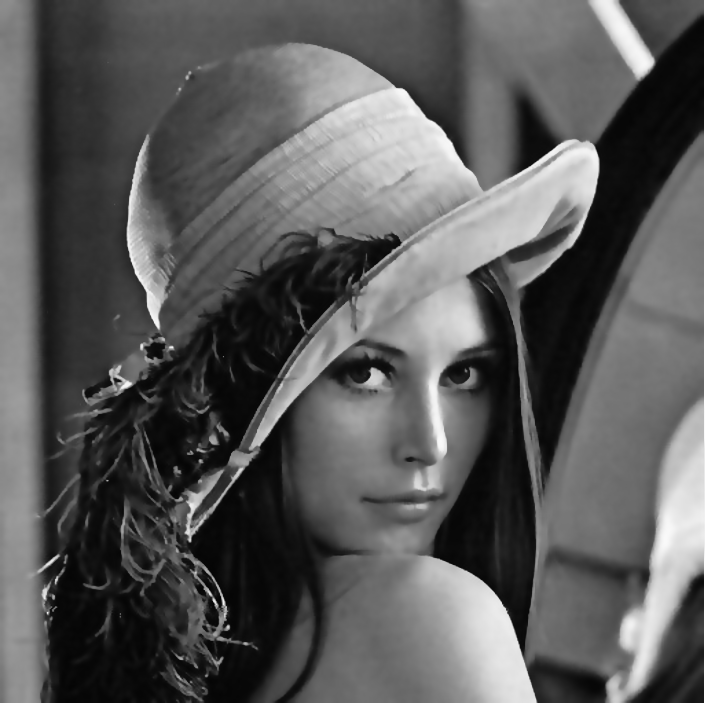

In [ ]:


# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # 1.2.1 Box Blurring
    box_blurred = cv2.blur(image, (5, 5))  # Kernel size: 5x5

    # 1.2.2 Gaussian Blurring
    gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size: 5x5, sigma: 0 (auto)

    # 1.2.3 Adaptive Blurring (using bilateralFilter as an example)
    adaptive_blurred = cv2.bilateralFilter(image, 9, 75, 75)  # d: 9, sigmaColor: 75, sigmaSpace: 75

    # Display the original and blurred images
    print("Original Image")
    cv2_imshow(image)

    print("Box Blurred Image")
    cv2_imshow(box_blurred)

    print("Gaussian Blurred Image")
    cv2_imshow(gaussian_blurred)

    print("Adaptive Blurred Image")
    cv2_imshow(adaptive_blurred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
# Flatten the images (28x28 -> 784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the data (0-255 -> 0-1 scaling)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Split the dataset (80-20 train-test split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 1. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)

# 2. Artificial Neural Network (ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20, random_state=42)
ann_scores = cross_val_score(ann_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_val_scaled)
ann_accuracy = accuracy_score(y_val, y_pred_ann)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [ ]:
# Print the results
print("Random Forest - Cross-validation Accuracy:", np.mean(rf_scores))
print("Random Forest - Test Accuracy:", rf_accuracy)
print("ANN - Cross-validation Accuracy:", np.mean(ann_scores))
print("ANN - Test Accuracy:", ann_accuracy)

# Choosing the better model
best_model = "ANN" if ann_accuracy > rf_accuracy else "Random Forest"
print("Best Performing Model:", best_model)


Random Forest - Cross-validation Accuracy: 0.9648749999999999
Random Forest - Test Accuracy: 0.9693333333333334
ANN - Cross-validation Accuracy: 0.9706458333333334
ANN - Test Accuracy: 0.9744166666666667
Best Performing Model: ANN
